<a href="https://colab.research.google.com/github/G0rav/fake_news_detection/blob/master/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
true = pd.read_csv('/content/drive/My Drive/Datasets/fake news data kaggle/True.csv')
fake = pd.read_csv('/content/drive/My Drive/Datasets/fake news data kaggle/Fake.csv')

In [ ]:
print(true.info())
print('='*50)
print(fake.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [ ]:
true['target'] = 1
fake['target'] = 0
df = pd.concat([true,fake], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
df['text'] = df.text.apply(lambda x: x.lower())
display(df)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",washington (reuters) - the head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington (reuters) - transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington (reuters) - the special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington (reuters) - trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattle/washington (reuters) - president donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st century wire says as 21wire reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st century wire says it s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,patrick henningsen 21st century wireremember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st century wire says al jazeera america will...,Middle-east,"January 14, 2016",0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.target, test_size=.25, random_state=123, stratify=df.target)

In [ ]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)
    print('\n')

(33673,)


(11225,)


(33673,)


(11225,)




In [ ]:
print('y_train distribution:')
print(y_train.value_counts())
print('y_test distribution:')
print(y_test.value_counts())

y_train distribution:
0    17610
1    16063
Name: target, dtype: int64
y_test distribution:
0    5871
1    5354
Name: target, dtype: int64


# Using Logistic Regression

In [ ]:
lr_pipeline_cv = Pipeline([('vect',CountVectorizer(stop_words='english')),
                     ('model',LogisticRegression())])
lr_pipeline_cv.fit(X_train, y_train)
lr_cv_pred = lr_pipeline_cv.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy: 99.63%


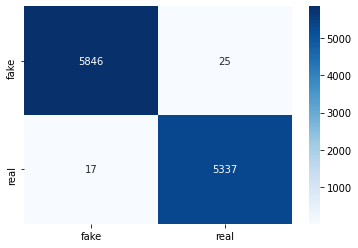

In [ ]:
print('accuracy: {:.2f}%'.format(accuracy_score(y_test,lr_cv_pred)*100))
cm = confusion_matrix(y_test,lr_cv_pred)
sns.heatmap(cm, cmap = 'Blues', annot= True, fmt = 'd', xticklabels = ['fake','real'], yticklabels = ['fake','real'])
plt.show()

In [ ]:
print(classification_report(y_test,pred, target_names=['fake','real']))

              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      5871
        real       1.00      1.00      1.00      5354

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [ ]:
scores = cross_val_score(lr_pipeline_cv, X= df.text, y= df.target, cv=5) 
print(scores)
print(scores.mean()*100)

[0.92728285 0.91681514 0.88452116 0.92092661 0.93596169]
91.71014897170359


In [ ]:
 
lr_pipeline_tf = Pipeline([('vect',TfidfVectorizer(stop_words='english')),
                     ('model',LogisticRegression())])
lr_pipeline_tf.fit(X_train, y_train)
lr_tf_pred = lr_pipeline_tf.predict(X_test)

accuracy: 98.65%


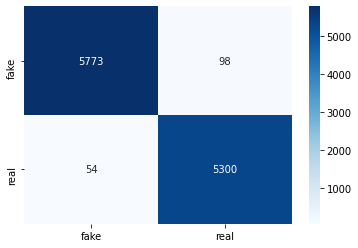

In [ ]:
print('accuracy: {:.2f}%'.format(accuracy_score(y_test,lr_tf_pred)*100))
cm = confusion_matrix(y_test,lr_tf_pred)
sns.heatmap(cm, cmap = 'Blues', annot= True, fmt = 'd', xticklabels = ['fake','real'], yticklabels = ['fake','real'])
plt.show()

In [ ]:
 print(classification_report(y_test,lr_tf_pred, target_names=['fake','real']))

              precision    recall  f1-score   support

        fake       0.99      0.98      0.99      5871
        real       0.98      0.99      0.99      5354

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
scores = cross_val_score(lr_pipeline_tf, X= df.text, y= df.target, cv=5) 
print(scores)
print(scores.mean()*100)

[0.98095768 0.97806236 0.9623608  0.97015258 0.97973048]
97.42527813599216


# Using Naive Bayes

In [ ]:
nb_pipeline_cv = Pipeline([('vect',CountVectorizer(stop_words='english')),
                     ('model',MultinomialNB())])
nb_pipeline_cv.fit(X_train, y_train)
nb_cv_pred = nb_pipeline_cv.predict(X_test)

accuracy: 95.33%


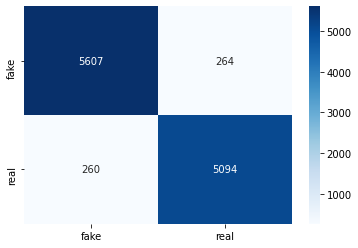

In [ ]:
print('accuracy: {:.2f}%'.format(accuracy_score(y_test,nb_cv_pred)*100))
cm = confusion_matrix(y_test,nb_cv_pred)
sns.heatmap(cm, cmap = 'Blues', annot= True, fmt = 'd', xticklabels = ['fake','real'], yticklabels = ['fake','real'])
plt.show()

In [ ]:
print(classification_report(y_test,nb_cv_pred, target_names=['fake','real']))

              precision    recall  f1-score   support

        fake       0.96      0.96      0.96      5871
        real       0.95      0.95      0.95      5354

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



In [ ]:
scores = cross_val_score(nb_pipeline_cv, X= df.text, y= df.target, cv=5) 
print(scores)
print(scores.mean()*100)

[0.92728285 0.91681514 0.88452116 0.92092661 0.93596169]
91.71014897170359


In [ ]:
nb_pipeline_tf = Pipeline([('vect', TfidfVectorizer(stop_words='english')), 
                           ('model', MultinomialNB())]) 
nb_pipeline_tf.fit(X_train, y_train) 
nb_tf_pred = nb_pipeline_tf.predict(X_test)

accuracy: 93.63%


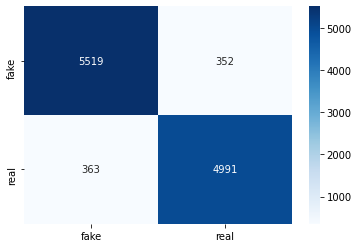

In [ ]:
print('accuracy: {:.2f}%'.format(accuracy_score(y_test,nb_tf_pred)*100))
cm = confusion_matrix(y_test,nb_tf_pred)
sns.heatmap(cm, cmap = 'Blues', annot= True, fmt = 'd', xticklabels = ['fake','real'], yticklabels = ['fake','real'])
plt.show()

In [34]:
scores = cross_val_score(nb_pipeline_tf, X= df.text, y= df.target, cv=5) 
print(scores)
print(scores.mean()*100)

[0.91158129 0.89053452 0.84977728 0.9094554  0.92849983]
89.79696649271463
